In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

In [2]:
ruta = r'C:\MachineLearning\Dataset\TornadosDataset\tornados.csv.zip'  # Ruta corregida con r para raw string
df = pd.read_csv(ruta)  # Solo cargamos el archivo sin ningún procesamiento adicional
df.head(10)


om    yr  mo  dy        date      time               tz  \
0  192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1  193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2  195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3  196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4  197  1950  11  20  1950-11-20  07:30:00  America/Chicago   
5  194  1950  11   4  1950-11-04  17:00:00  America/Chicago   
6  198  1950  12   2  1950-12-02  15:00:00  America/Chicago   
7  199  1950  12   2  1950-12-02  16:00:00  America/Chicago   
8  200  1950  12   2  1950-12-02  16:25:00  America/Chicago   
9  201  1950  12   2  1950-12-02  17:30:00  America/Chicago   

           datetime_utc  st  stf  ...    elon   len  wid  ns  sn   f1   f2  \
0  1950-10-02T03:00:00Z  OK   40  ... -102.30  15.8   10   1   1   25    0   
1  1950-10-09T08:15:00Z  NC   37  ...    0.00   2.0  880   1   1   47    0   
2  1950-11-20T08:20:00Z  KY   21  ...    0.00   0.1   10   1   1  177    0   
3  1950-11-20T10:00:00Z  KY   21  ...    0.00   0.1   10   1   1  209    0   
4  1950-11-20T13:30:00Z  MS   28  ...    0.00   2.0   37   1   1  101    0   
5  1950-11-04T23:00:00Z  PA   42  ...  -75.93  15.9  100   1   1   71   11   
6  1950-12-02T21:00:00Z  IL   17  ...  -89.72  18.8   50   1   1  119  117   
7  1950-12-02T22:00:00Z  IL   17  ...  -89.38  18.0  200   1   1  119    5   
8  1950-12-02T22:25:00Z  AR    5  ...  -91.72   7.8   10   1   1   65    0   
9  1950-12-02T23:30:00Z  IL   17  ...  -89.62   9.6   50   1   1  157    0   

   f3  f4     fc  
0   0   0  False  
1   0   0  False  
2   0   0  False  
3   0   0  False  
4   0   0  False  
5   0   0  False  
6   0   0  False  
7   0   0  False  
8   0   0  False  
9   0   0  False  

[10 rows x 27 columns]

In [3]:
df.shape

(68693, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [5]:
df.describe().T

count          mean           std        min       25%         50%  \
om    68693.0  1.132018e+05  2.266220e+05     1.0000    285.00    588.0000   
yr    68693.0  1.991854e+03  1.956516e+01  1950.0000   1976.00   1995.0000   
mo    68693.0  5.968541e+00  2.444656e+00     1.0000      4.00      6.0000   
dy    68693.0  1.593088e+01  8.750070e+00     1.0000      8.00     16.0000   
stf   68693.0  2.922026e+01  1.501327e+01     1.0000     18.00     28.0000   
mag   67937.0  7.787215e-01  8.957898e-01     0.0000      0.00      1.0000   
inj   68693.0  1.418689e+00  1.811475e+01     0.0000      0.00      0.0000   
fat   68693.0  8.931041e-02  1.472120e+00     0.0000      0.00      0.0000   
loss  41523.0  2.020898e+06  3.039588e+07    50.0000  10000.00  50000.0000   
slat  68693.0  3.712939e+01  5.099005e+00    17.7212     33.18     37.0000   
slon  68693.0 -9.276149e+01  8.672112e+00  -163.5300    -98.42    -93.5552   
elat  68693.0  2.296065e+01  1.852814e+01     0.0000      0.00     32.5500   
elon  68693.0 -5.683609e+01  4.534073e+01  -163.5300    -94.78    -84.7200   
len   68693.0  3.489270e+00  8.247115e+00     0.0000      0.12      0.8000   
wid   68693.0  1.077676e+02  2.068513e+02     0.0000     20.00     50.0000   
ns    68693.0  1.008764e+00  9.505967e-02     1.0000      1.00      1.0000   
sn    68693.0  9.914111e-01  9.227835e-02     0.0000      1.00      1.0000   
f1    68693.0  1.046440e+02  9.675030e+01     0.0000     37.00     85.0000   
f2    68693.0  8.605142e+00  3.810602e+01     0.0000      0.00      0.0000   
f3    68693.0  1.687202e+00  1.668166e+01     0.0000      0.00      0.0000   
f4    68693.0  5.067911e-01  9.163194e+00     0.0000      0.00      0.0000   

            75%           max  
om      1118.00  6.220800e+05  
yr      2008.00  2.022000e+03  
mo         7.00  1.200000e+01  
dy        24.00  3.100000e+01  
stf       42.00  7.800000e+01  
mag        1.00  5.000000e+00  
inj        0.00  1.740000e+03  
fat        0.00  1.580000e+02  
loss  500000.00  2.800100e+09  
slat      40.92  6.102000e+01  
slon     -86.73 -6.471510e+01  
elat      38.65  6.102000e+01  
elon       0.00  0.000000e+00  
len        3.21  2.347000e+02  
wid      100.00  4.576000e+03  
ns         1.00  3.000000e+00  
sn         1.00  1.000000e+00  
f1       137.00  8.100000e+02  
f2         0.00  8.200000e+02  
f3         0.00  7.100000e+02  
f4         0.00  5.070000e+02

In [6]:
df.isnull().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Calculate the number of days since a reference date (e.g., the minimum date in the column)
df['date_numeric'] = (df['date'] - df['date'].min()).dt.days

In [9]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Extract the time in seconds since midnight and store it in a new column 'time_numeric'
df['time_numeric'] = df['time'].dt.hour * 3600 + df['time'].dt.minute * 60 + df['time'].dt.second

In [10]:
# List of numeric column names
numeric_columns = ['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4']

# Create a DataFrame with only the numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print or use the correlation_matrix as needed
print(correlation_matrix)

            om        yr        mo        dy       stf       mag       inj  \
om    1.000000  0.641333 -0.014129  0.038291  0.017673 -0.123721 -0.018815   
yr    0.641333  1.000000  0.011081  0.020438 -0.011882 -0.270327 -0.035231   
mo   -0.014129  0.011081  1.000000 -0.022037  0.017126 -0.053477 -0.023666   
dy    0.038291  0.020438 -0.022037  1.000000  0.007341 -0.010681 -0.009103   
stf   0.017673 -0.011882  0.017126  0.007341  1.000000  0.005377 -0.011306   
mag  -0.123721 -0.270327 -0.053477 -0.010681  0.005377  1.000000  0.230651   
inj  -0.018815 -0.035231 -0.023666 -0.009103 -0.011306  0.230651  1.000000   
fat  -0.007449 -0.027722 -0.025170 -0.003246 -0.009078  0.207488  0.757170   
loss  0.011247  0.019826 -0.009462 -0.001654 -0.005006  0.147667  0.528723   
slat -0.036809 -0.070104  0.057358 -0.002550  0.153543  0.065990 -0.003999   
slon  0.076815  0.108611  0.038201 -0.010476 -0.118155 -0.030855  0.017725   
elat  0.352794  0.512345 -0.021748  0.008169  0.012422  0.135053

# Análisis Exploratorio de Datos

<function matplotlib.pyplot.show(close=None, block=None)>

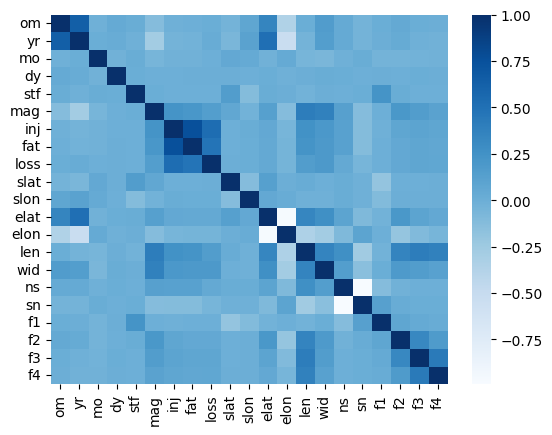

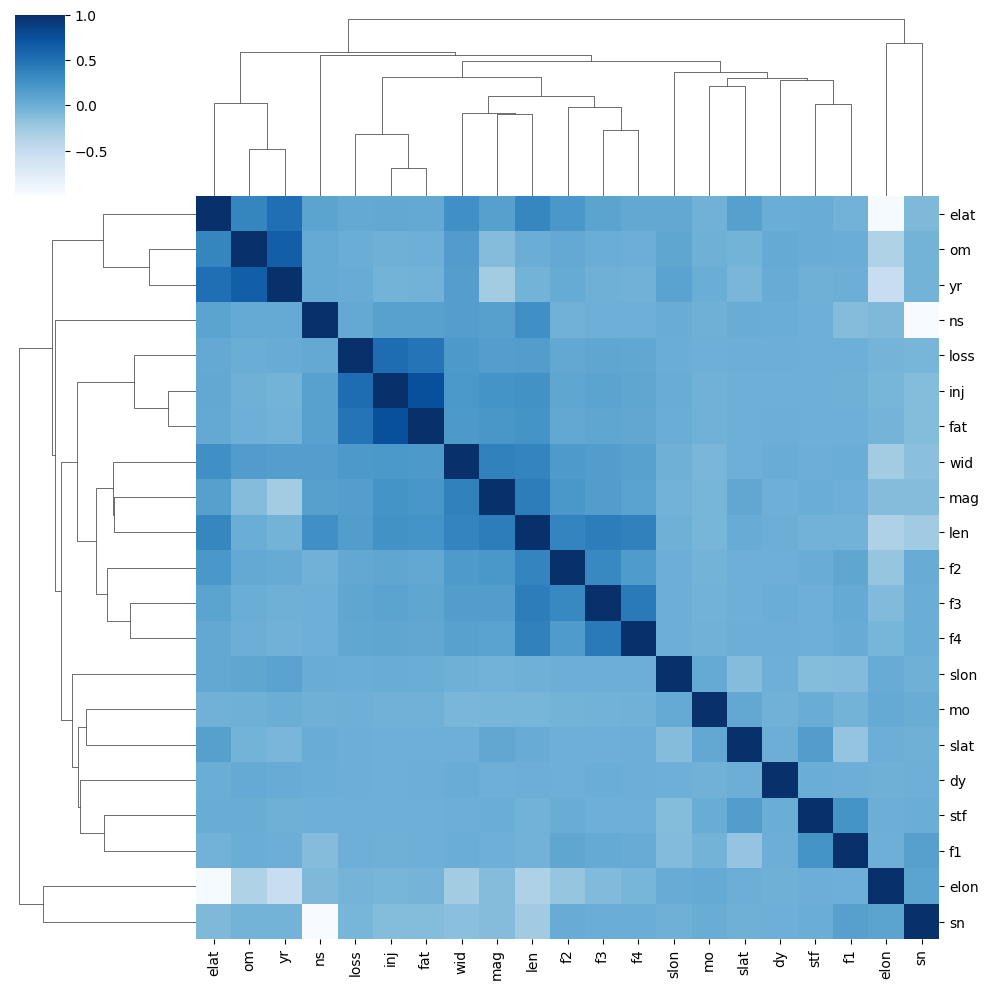

In [11]:
sns.heatmap(correlation_matrix,fmt='.2f',cmap='Blues')
plt.show

sns.clustermap(correlation_matrix,fmt='.2f',cmap='Blues')
plt.show

### Análisis Univariado

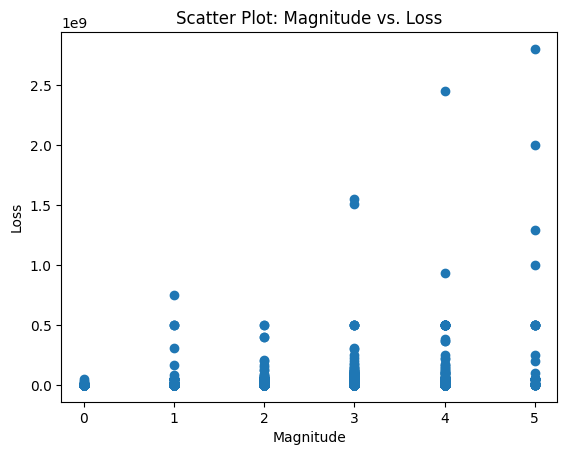

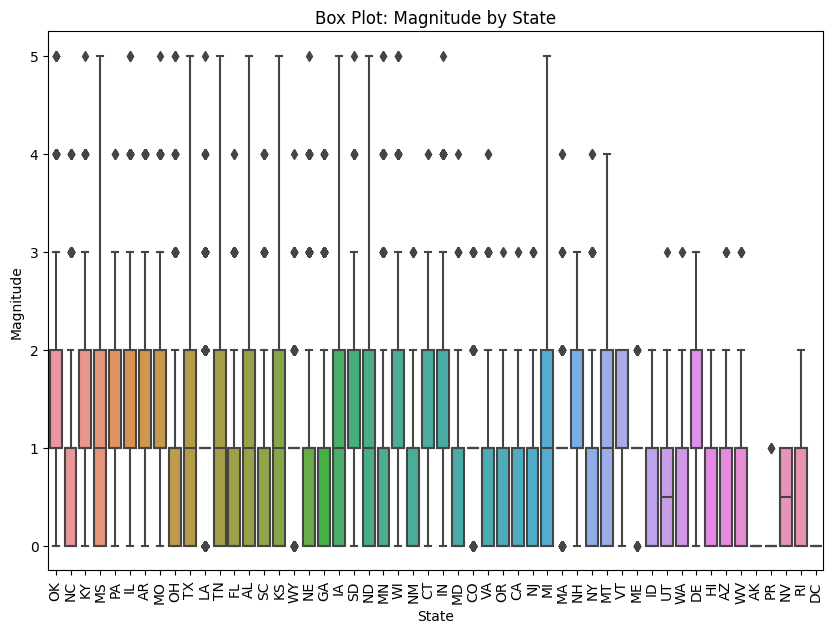

In [12]:
# Scatter plot for two numeric columns (e.g., 'mag' vs. 'loss')
plt.scatter(df['mag'], df['loss'])
plt.xlabel('Magnitude')
plt.ylabel('Loss')
plt.title('Scatter Plot: Magnitude vs. Loss')
plt.show()

# Box plot to visualize the distribution of a numeric column by a categorical column (e.g., 'st' vs. 'mag')
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='st', y='mag')
plt.xlabel('State')
plt.ylabel('Magnitude')
plt.title('Box Plot: Magnitude by State')
plt.xticks(rotation=90)
plt.show()

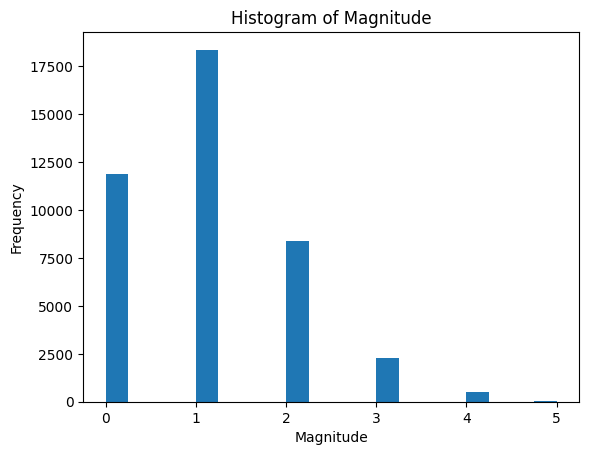

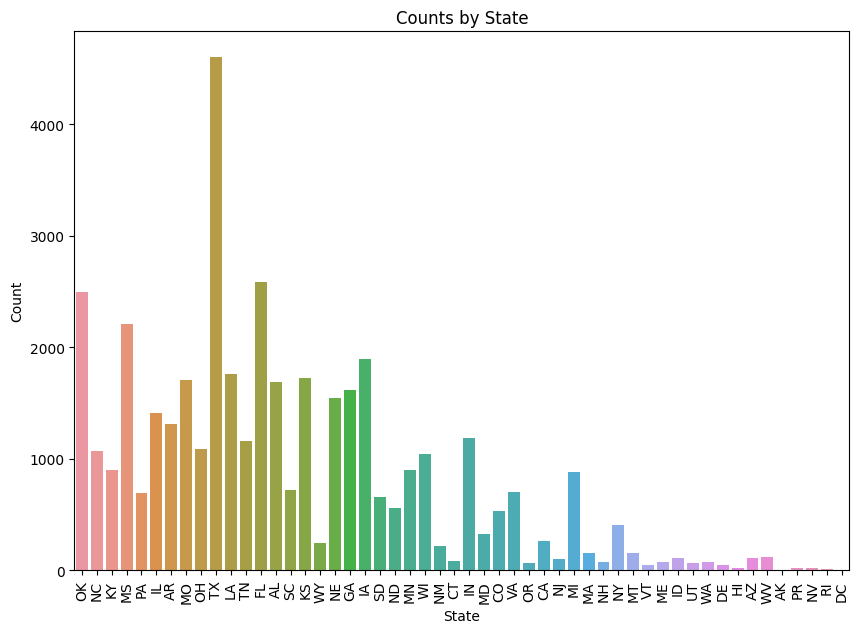

In [13]:
# Histogram for a numeric column (e.g., 'mag')
plt.hist(df['mag'], bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')
plt.show()

# Bar plot for a categorical column (e.g., 'st')
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='st')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Counts by State')
plt.xticks(rotation=90)
plt.show()

In [14]:
fig = px.pie(df, names='st', title='Distribution of States')
fig.show()

In [15]:
fig = px.box(df, x='mag', title='Distribution of Magnitude')
fig.show()

In [16]:
# Select a subset of numeric columns for pair plotting
subset_columns = ['mag', 'loss', 'len', 'wid', 'inj']

# Create a pair plot for selected columns
fig = px.scatter_matrix(df, dimensions=subset_columns, title='Pair Plot of Numeric Variables')
fig.show()

<Axes: xlabel='Total Loss (in 100 millions)$', ylabel='yr'>

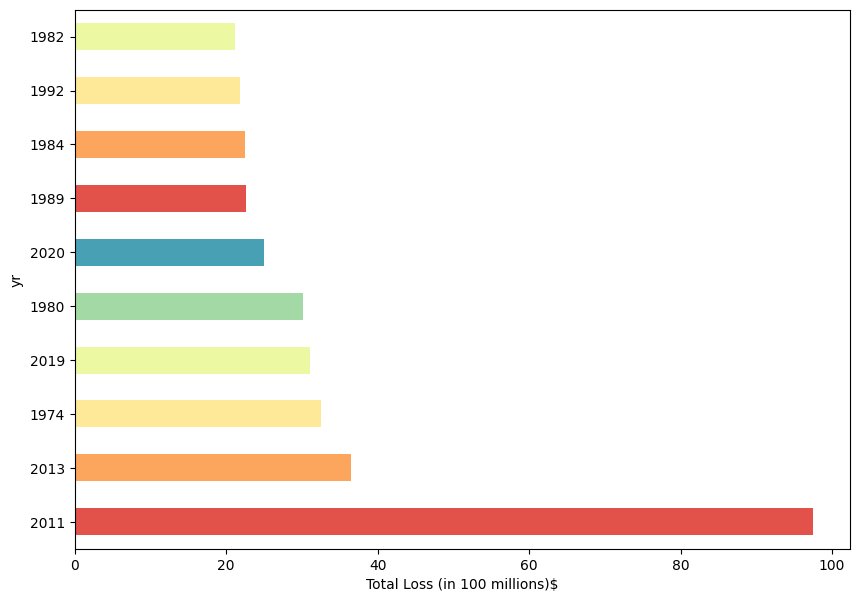

In [17]:
# count the injuries in each year and plot the highest 10
injuries_sorted_by_year = (df.groupby('yr')['loss'].sum()/ 100000000).sort_values(ascending=False)
injuries_sorted_by_year[:10].plot(kind='barh', color=sns.color_palette('Spectral'), figsize=(10, 7),  xlabel='Total Loss (in 100 millions)$')

In [18]:
fig = px.scatter_3d(df, x='mag', y='loss', z='len', color='fat', title='3D Scatter Plot: Magnitude vs. Loss vs. Length')
fig.show()

In [19]:
fig = px.scatter_geo(df, lat='slat', lon='slon', title='Geographic Scatter Plot')
fig.update_geos(projection_type='natural earth')
fig.show()

# MODELOS 

### Modelo de Regresión

In [20]:
# Select features (independent variables) and the target variable
X = df[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid']]
y = df['loss']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Predicciones



In [23]:
# Calculate the Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error: 535175920589345.81
R-squared (R2): 0.02


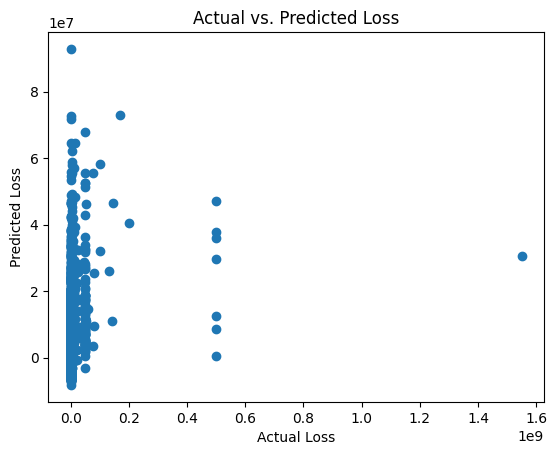

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.title('Actual vs. Predicted Loss')
plt.show()

In [25]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'constant'

# Fit and transform the imputer on your data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Create a HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

HistGradientBoostingRegressor()

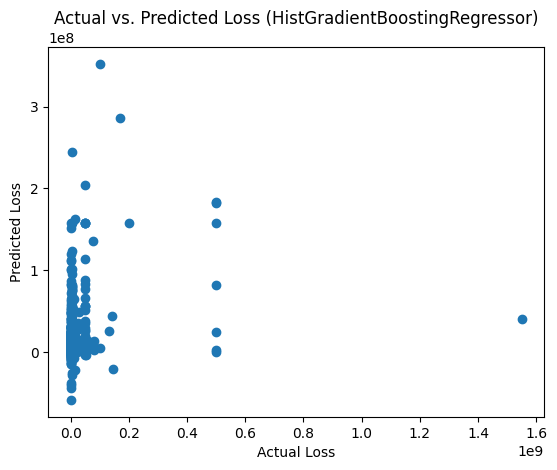

In [26]:
y_pred = model.predict(X_test)
# Create a scatter plot to visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')
plt.title('Actual vs. Predicted Loss (HistGradientBoostingRegressor)')
plt.show()